<center><h1> EARTHQUAKE CLASSIFIER </h1> </center>



---


#APPROACH

---




1. Import all the libraries
2. Load and Audit the data
3. Data preparation and Data Transformation
      1. Missing values: impute all missing values using Mean,Median and Mode
      2. Inconistent values: Replace all inconsistence with consistent values
      3. Outliers: Transform or let algorithm deal
4. Data Visualization
5. Data Analysis
      1. Uni-Variant Analysis
      2. Bi-Varient Analysis
      3. Multi-Varient Analysis
          1. Classification Problem
          2. Apply Machine Learing Models
          3. Compare and bring out the best Model
       




---


# IMPORTING LIBRARIES
---




In [1]:
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocesing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Evaluation metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
from scipy.stats import chi2_contingency





# READING AND AUDITING DATASET
---

In [2]:
df=pd.read_csv('/content/earthquake_data.csv')

In [3]:
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

In [5]:
print("No of Rows:",df.shape[0])
print("No of Columns:",df.shape[1])

No of Rows: 782
No of Columns: 19


In [6]:
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print('Numerical Columns :',len(num_cols))
print(num_cols)
print("-------------------------------------------------------------------------------------------------------")
print('Categorical Columns :',len(cat_cols))
print(cat_cols)


Numerical Columns : 11
Index(['magnitude', 'cdi', 'mmi', 'tsunami', 'sig', 'nst', 'dmin', 'gap',
       'depth', 'latitude', 'longitude'],
      dtype='object')
-------------------------------------------------------------------------------------------------------
Categorical Columns : 8
Index(['title', 'date_time', 'alert', 'net', 'magType', 'location',
       'continent', 'country'],
      dtype='object')


In [8]:
# Univarient Analysis

df.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,0.388747,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199
std,0.445514,3.169939,1.462724,0.487778,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886
min,6.500000,0.000000,1.000000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.000000,0.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050
50%,6.800000,5.000000,6.000000,0.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000
75%,7.100000,7.000000,7.000000,1.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000
max,9.100000,9.000000,9.000000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


# DATA PREPARATION & VISUALISATION

---



In [7]:
# Dropping unwanted column

df.drop('title',axis=1,inplace= True)

In [9]:
# To check missing values

df.isnull().sum()

magnitude      0
date_time      0
cdi            0
mmi            0
alert        367
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       5
continent    576
country      298
dtype: int64



> INFERENCE:

There are missing values in below columnns :

*   alert
*   location
*   continent
*   Country



In [10]:
# Replacing the missing values

df['alert']=np.where(df['alert'].isna(),df['alert'].mode(dropna=True),df['alert'])
df['location']=np.where(df['location'].isna(),df['location'].mode(dropna=True),df['location'])
df['continent']=np.where(df['continent'].isna(),df['continent'].mode(dropna=True),df['continent'])
df['country']=np.where(df['country'].isna(),df['country'].mode(dropna=True),df['country'])

In [11]:
# Checking the missing values after replacement

df.isnull().sum()

magnitude    0
date_time    0
cdi          0
mmi          0
alert        0
tsunami      0
sig          0
net          0
nst          0
dmin         0
gap          0
magType      0
depth        0
latitude     0
longitude    0
location     0
continent    0
country      0
dtype: int64



>  INFERENCE


Data has no missing values.

In [12]:
# Converting the datatime datatype

df['date_time'] = pd.to_datetime(df['date_time'])
df.dtypes

magnitude           float64
date_time    datetime64[ns]
cdi                   int64
mmi                   int64
alert                object
tsunami               int64
sig                   int64
net                  object
nst                   int64
dmin                float64
gap                 float64
magType              object
depth               float64
latitude            float64
longitude           float64
location             object
continent            object
country              object
dtype: object


>  INFERENCE


DataType successfully changed.

<Axes: ylabel='alert'>

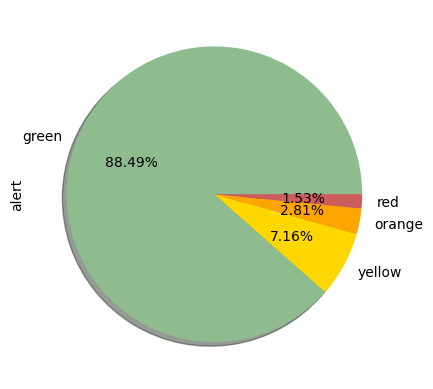

In [13]:
# Distribution of Target variable

df['alert'].value_counts().plot(kind='pie',autopct='%0.2f%%',colors=['darkseagreen','gold','orange','indianred'],shadow=True)



> INFERENCE


*   Green alert light is considered to be safe and covers highest percentage of 88.49
*   Yellow alert light is indicates slight danger zone and has 7.16%
*   Orange alert light is indicates more danger compared to yellow and have to be causious.
*   Red alert light is indicates very danger zone having highest possibilities of tsunami.







<Axes: >

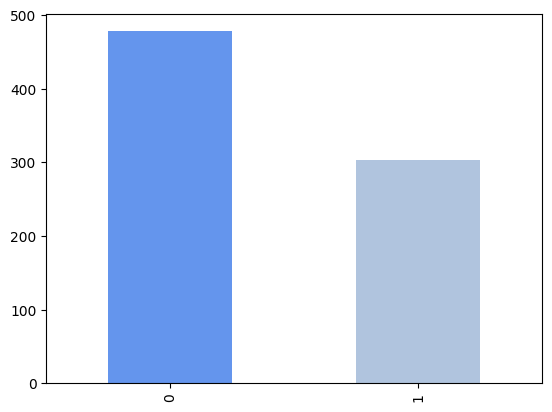

In [14]:
# Visualisation of Feature variable

df['tsunami'].value_counts().plot(kind='bar',color=['cornflowerblue','lightsteelblue'])



> **INFERENCE**

The data is distributed good. Here,


*   '0' represents False that is, Tsunami has not occured.
*   '1' represents True that is, Tsunami has taken place.





In [15]:
# Extracting the months

df['month']=df['date_time'].dt.month
df['month'].head()

0    11
1    11
2    12
3    11
4     9
Name: month, dtype: int64

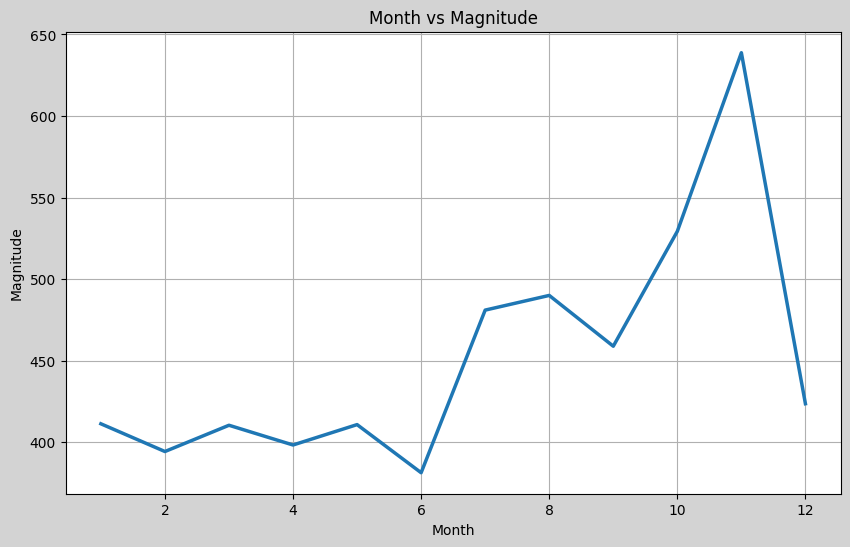

In [16]:
# Visualising the month which has highest magnitude

# Create a figure and set its background color
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightgrey')

df.groupby('month')['magnitude'].sum().plot(kind='line',linewidth=2.5)
plt.grid()
plt.title('Month vs Magnitude')
plt.xlabel('Month')
plt.ylabel('Magnitude')
plt.show()



>  **INFERENCE**

 On the month of november, The magnitude was at peek.



In [17]:
# Since Tsunami is catagorical data changing its datatype

df['tsunami'] = df['tsunami'].astype('str')
df.dtypes

magnitude           float64
date_time    datetime64[ns]
cdi                   int64
mmi                   int64
alert                object
tsunami              object
sig                   int64
net                  object
nst                   int64
dmin                float64
gap                 float64
magType              object
depth               float64
latitude            float64
longitude           float64
location             object
continent            object
country              object
month                 int64
dtype: object

In [18]:
# Checking the outliers based on the skewness
df.skew()

<ipython-input-18-7afc041accba>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


magnitude    1.444440
cdi         -0.197310
mmi         -0.250403
tsunami      0.457333
sig          3.083629
nst          0.533307
dmin         2.604580
gap          4.668607
depth        3.024869
latitude     0.200853
longitude   -0.702982
month       -0.168834
dtype: float64


>  **INFERENCE**

The following are highly skewed:
* sig
* dmin
* gap
* depth

Identifying and addressing outliers in a dataset is a crucial data preprocessing step as these are data points that deviate significantly from the majority of data, potentially skewing the analysis or results.


In [19]:
# Storing the skewed variable in a new variable

skewed_cols = df[['sig','dmin','gap','depth']]
print(skewed_cols)

     sig   dmin   gap    depth
0    768  0.509  17.0   14.000
1    735  2.229  34.0   25.000
2    755  3.125  18.0  579.000
3    833  1.865  21.0   37.000
4    670  4.998  27.0  624.464
..   ...    ...   ...      ...
777  912  0.000   0.0   60.000
778  745  0.000   0.0   36.400
779  776  0.000   0.0  103.000
780  711  0.000   0.0   33.000
781  865  0.000   0.0   33.000

[782 rows x 4 columns]


In [20]:
def plot_boxplots(data, columns):
    for column in columns:
        sns.boxplot(data=data, x=column)
        plt.title(f'Box Plot of {column}')
        plt.show()

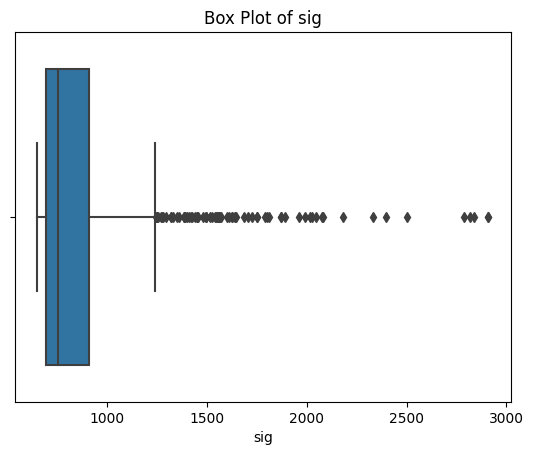

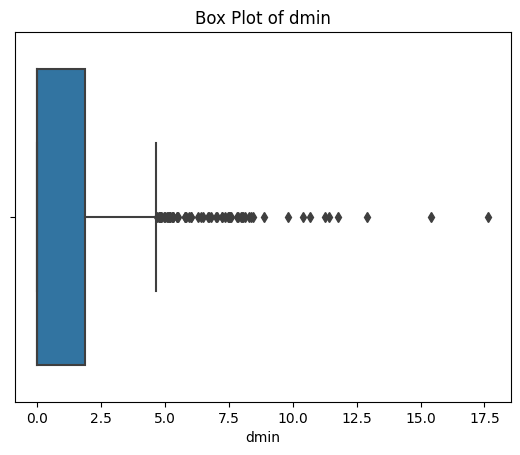

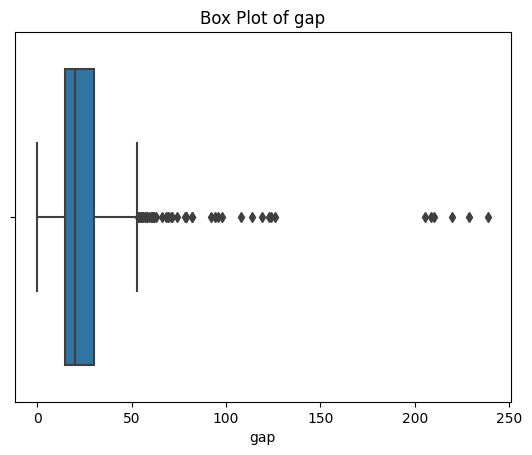

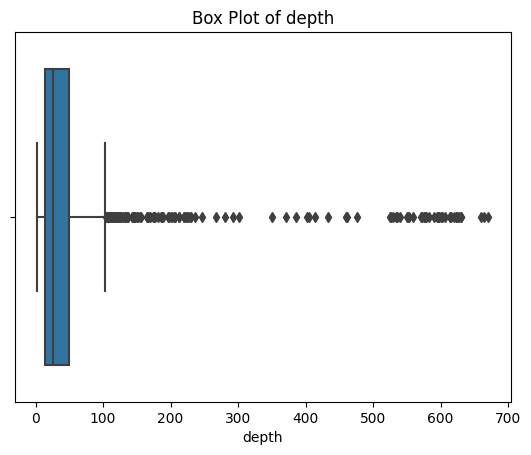

In [21]:
plot_boxplots(df, skewed_cols)

In [22]:
# Treating the outliers

def handle_outlier(data,cols):
  for x in cols:
    q75,q25 = np.percentile(df[x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [23]:
handle_outlier(df,skewed_cols)

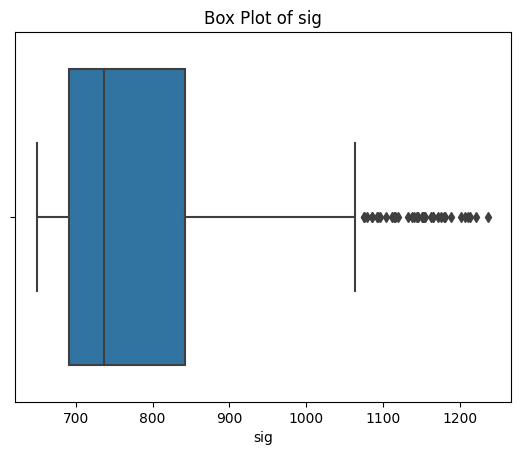

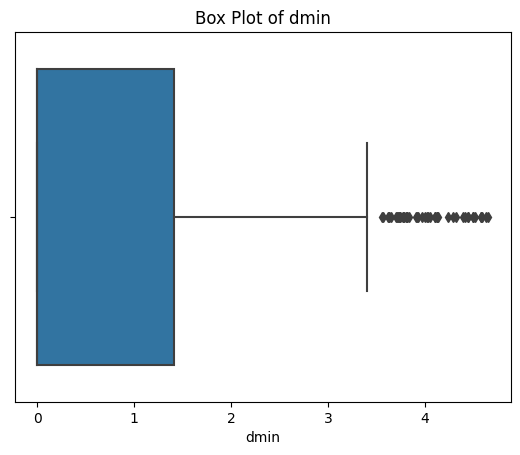

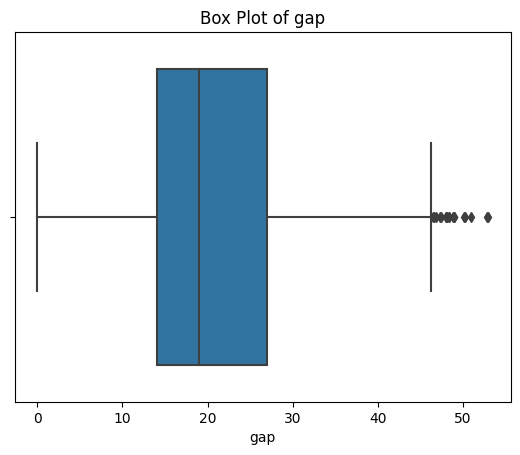

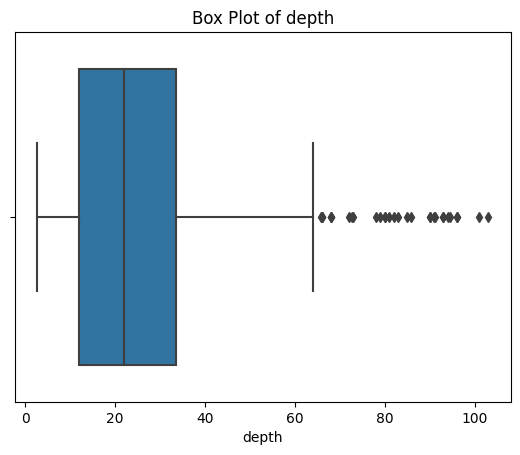

In [24]:
# After handling skewness

plot_boxplots(df, skewed_cols)

In [25]:
# Checking skewness after treating

df.skew()

<ipython-input-25-5185d0dafb9e>:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


magnitude    1.444440
cdi         -0.197310
mmi         -0.250403
tsunami      0.457333
sig          1.313446
nst          0.533307
dmin         1.452108
gap          0.341520
depth        1.723824
latitude     0.200853
longitude   -0.702982
month       -0.168834
dtype: float64

Yes! The skewness is reduced

In [26]:
# Checking the missing values after treating

df.isnull().sum()

magnitude      0
date_time      0
cdi            0
mmi            0
alert          0
tsunami        0
sig           73
net            0
nst            0
dmin          61
gap           48
magType        0
depth        139
latitude       0
longitude      0
location       0
continent      0
country        0
month          0
dtype: int64

In [27]:
# Creating a function to replace the missing values,

def replacing_values(data, skewed_cols):
    for col in skewed_cols:
        data[col].fillna(data[col].median(), inplace=True)
    return data

In [28]:
# Passing the skewed columns to the replacing user-defined function

replacing_values(df,skewed_cols)

,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country,month
0,7.0,2022-11-22 02:03:00,8,7,green,1,768.0,us,117,0.509,17.0,mww,14.0,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands,11
1,6.9,2022-11-18 13:37:00,4,4,green,0,735.0,us,99,2.229,34.0,mww,25.0,-4.9559,100.738,"Bengkulu, Indonesia",Asia,Indonesia,11
2,7.0,2022-12-11 07:09:00,3,3,green,1,755.0,us,147,3.125,18.0,mww,22.0,-20.0508,-178.346,"Kirakira, Solomon Islands",Oceania,Fiji,12
3,7.3,2022-11-11 10:48:00,5,5,green,1,833.0,us,149,1.865,21.0,mww,37.0,-19.2918,-172.129,"Neiafu, Tonga",Asia,Indonesia,11
4,6.6,2022-09-11 10:14:00,0,2,green,1,670.0,us,131,0.000,27.0,mww,22.0,-25.5948,178.278,"Kirakira, Solomon Islands",Asia,Indonesia,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,2001-01-13 17:33:00,0,8,green,0,912.0,us,427,0.000,0.0,mwc,60.0,13.0490,-88.660,"Puerto El Triunfo, El Salvador",Asia,Indonesia,1
778,6.9,2001-10-01 16:02:00,5,7,green,0,745.0,ak,0,0.000,0.0,mw,36.4,56.7744,-153.281,"Old Harbor, Alaska",North America,Indonesia,10
779,7.1,2001-09-01 16:49:00,0,7,green,0,776.0,us,372,0.000,0.0,mwb,103.0,-14.9280,167.170,"Port-Olry, Vanuatu",Asia,Vanuatu,9
780,6.8,2001-01-01 08:54:00,0,5,green,0,711.0,us,64,0.000,0.0,mwc,33.0,6.6310,126.899,"Mindanao, Philippines",Asia,Indonesia,1


In [29]:
# Checking the missing values

df.isnull().sum()

magnitude    0
date_time    0
cdi          0
mmi          0
alert        0
tsunami      0
sig          0
net          0
nst          0
dmin         0
gap          0
magType      0
depth        0
latitude     0
longitude    0
location     0
continent    0
country      0
month        0
dtype: int64

<ipython-input-30-71b6bf05aa11>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt='0.1f',cmap='PuBuGn')


<Axes: >

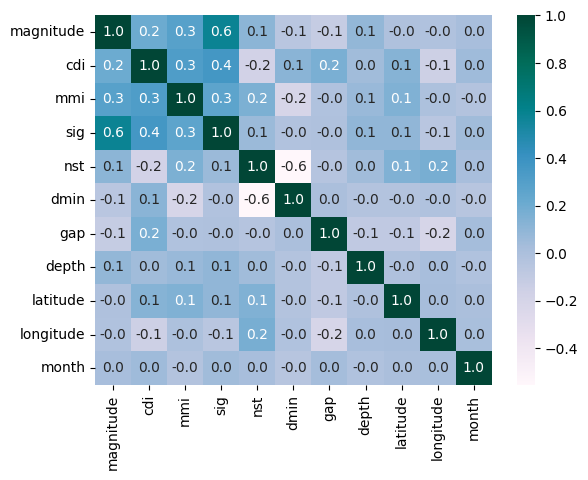

In [30]:
# Visualising correlation among the columns

sns.heatmap(df.corr(),annot=True,fmt='0.1f',cmap='PuBuGn')



> **INFERENCE**


Here, Highly positive correlated columns are 'sig' and 'magnitude' with 0.6.

In [31]:
# Distribution of target variable

df['alert'].value_counts()

green     692
yellow     56
orange     22
red        12
Name: alert, dtype: int64



> **INFERENCE**



The values are not evenly distributed and requires a balancing treatment

In [32]:
features = ["magnitude", "depth", "cdi", "mmi", "sig", "depth"]
target = "alert"

In [33]:
# Treating the imbalanced data

from imblearn.over_sampling import SMOTE
x = df[features]
y = df[target]
x = x.loc[:,~x.columns.duplicated()]
sm = SMOTE(random_state=42)
x_res, y_res= sm.fit_resample(x, y,)

<Axes: title={'center': 'Count of Alert'}, ylabel='alert'>

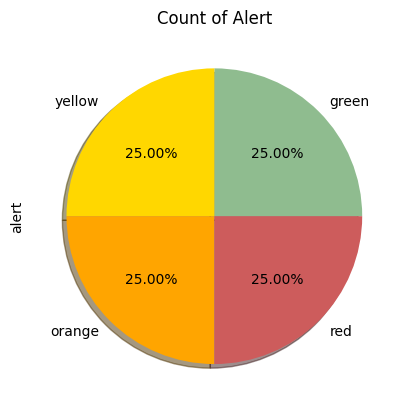

In [54]:
# Distribution of Target variable after balancing

y_res.value_counts().plot(kind='pie',autopct='%0.2f%%', title='Count of Alert',colors=['darkseagreen','gold','orange','indianred'],shadow = True)



> **INFERENCE**

The data is now evenly distributed.



# BUIDLING MODEL

---



In [35]:
# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2)

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2214, 5)
(554, 5)
(2214,)
(554,)


In [37]:
# Performing feature scaling

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



> INFERENCE

Feature scaling helps the Machine Learning model to improve its performance.


In [38]:
# Function generate the report

def acc_report(actual,predicted):
  acc_score=accuracy_score(actual,predicted)
  cm_matrix=confusion_matrix(actual,predicted)
  clas_rep=classification_report(actual,predicted)
  print("Accuracy :",round(acc_score,2))
  print(" ")
  print(cm_matrix)
  print(" ")
  print(clas_rep)



> INFERENCE

This user-defined function helps providing the report consist of:
*   Accuracy
*   Confusion matrix
*   classification report

All of these metrics can be useful for evaluating the performance of a machine learning models.




In [39]:
# Logistic Regression

lr=LogisticRegression()
lr.fit(x_train,y_train)

preds_lr_train=lr.predict(x_train)
preds_lr_test=lr.predict(x_test)

acc_report(y_train,preds_lr_train)

Accuracy : 0.68
 
[[413  25  15  93]
 [  0 225 122 204]
 [  6  38 496  14]
 [ 65  95  38 365]]
 
              precision    recall  f1-score   support

       green       0.85      0.76      0.80       546
      orange       0.59      0.41      0.48       551
         red       0.74      0.90      0.81       554
      yellow       0.54      0.65      0.59       563

    accuracy                           0.68      2214
   macro avg       0.68      0.68      0.67      2214
weighted avg       0.68      0.68      0.67      2214



In [40]:
lr_test = acc_report(y_test,preds_lr_test)

Accuracy : 0.68
 
[[110   1   6  29]
 [  0  57  35  49]
 [  1   6 128   3]
 [ 26  15   6  82]]
 
              precision    recall  f1-score   support

       green       0.80      0.75      0.78       146
      orange       0.72      0.40      0.52       141
         red       0.73      0.93      0.82       138
      yellow       0.50      0.64      0.56       129

    accuracy                           0.68       554
   macro avg       0.69      0.68      0.67       554
weighted avg       0.69      0.68      0.67       554



In [41]:
# Decision Tree

dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

preds_dtree_train=dtree.predict(x_train)
preds_dtree_test=dtree.predict(x_test)

acc_report(y_train,preds_dtree_train)

Accuracy : 1.0
 
[[546   0   0   0]
 [  0 551   0   0]
 [  0   0 554   0]
 [  0   0   0 563]]
 
              precision    recall  f1-score   support

       green       1.00      1.00      1.00       546
      orange       1.00      1.00      1.00       551
         red       1.00      1.00      1.00       554
      yellow       1.00      1.00      1.00       563

    accuracy                           1.00      2214
   macro avg       1.00      1.00      1.00      2214
weighted avg       1.00      1.00      1.00      2214



In [42]:
dtree_test = acc_report(y_test,preds_dtree_test)

Accuracy : 0.87
 
[[125   4   1  16]
 [  5 124  10   2]
 [  2  11 124   1]
 [ 15   3   2 109]]
 
              precision    recall  f1-score   support

       green       0.85      0.86      0.85       146
      orange       0.87      0.88      0.88       141
         red       0.91      0.90      0.90       138
      yellow       0.85      0.84      0.85       129

    accuracy                           0.87       554
   macro avg       0.87      0.87      0.87       554
weighted avg       0.87      0.87      0.87       554





> INFERENCE

Decision tree is High Biased and high variance Model, This results in the model performing well on the training data but poorly on the test data.




In [43]:
# Random Forest

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

preds_rf_train=rf.predict(x_train)
preds_rf_test=rf.predict(x_test)

acc_report(y_train,preds_rf_train)

Accuracy : 1.0
 
[[546   0   0   0]
 [  0 551   0   0]
 [  0   0 554   0]
 [  0   0   0 563]]
 
              precision    recall  f1-score   support

       green       1.00      1.00      1.00       546
      orange       1.00      1.00      1.00       551
         red       1.00      1.00      1.00       554
      yellow       1.00      1.00      1.00       563

    accuracy                           1.00      2214
   macro avg       1.00      1.00      1.00      2214
weighted avg       1.00      1.00      1.00      2214



In [44]:
rf_test = acc_report(y_test,preds_rf_test)

Accuracy : 0.94
 
[[132   3   1  10]
 [  0 131   7   3]
 [  0   1 137   0]
 [  5   5   0 119]]
 
              precision    recall  f1-score   support

       green       0.96      0.90      0.93       146
      orange       0.94      0.93      0.93       141
         red       0.94      0.99      0.97       138
      yellow       0.90      0.92      0.91       129

    accuracy                           0.94       554
   macro avg       0.94      0.94      0.94       554
weighted avg       0.94      0.94      0.94       554



In [45]:
# KNN

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

preds_knn_train=knn.predict(x_train)
preds_knn_test=knn.predict(x_test)

acc_report(y_train,preds_knn_train)

Accuracy : 0.92
 
[[446  22   5  73]
 [  0 520  24   7]
 [  0   7 546   1]
 [  6  25  18 514]]
 
              precision    recall  f1-score   support

       green       0.99      0.82      0.89       546
      orange       0.91      0.94      0.92       551
         red       0.92      0.99      0.95       554
      yellow       0.86      0.91      0.89       563

    accuracy                           0.92      2214
   macro avg       0.92      0.91      0.91      2214
weighted avg       0.92      0.92      0.91      2214



In [46]:
knn_test = acc_report(y_test,preds_knn_test)

Accuracy : 0.9
 
[[121   3   3  19]
 [  0 128   9   4]
 [  0   2 134   2]
 [  4   9   1 115]]
 
              precision    recall  f1-score   support

       green       0.97      0.83      0.89       146
      orange       0.90      0.91      0.90       141
         red       0.91      0.97      0.94       138
      yellow       0.82      0.89      0.86       129

    accuracy                           0.90       554
   macro avg       0.90      0.90      0.90       554
weighted avg       0.90      0.90      0.90       554



In [47]:
# Gradient Boosting

gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

preds_gb_train=gb.predict(x_train)
preds_gb_test=gb.predict(x_test)

acc_report(y_train,preds_gb_train)

Accuracy : 0.95
 
[[502  11   2  31]
 [  0 519  30   2]
 [  0   4 544   6]
 [  6  12   2 543]]
 
              precision    recall  f1-score   support

       green       0.99      0.92      0.95       546
      orange       0.95      0.94      0.95       551
         red       0.94      0.98      0.96       554
      yellow       0.93      0.96      0.95       563

    accuracy                           0.95      2214
   macro avg       0.95      0.95      0.95      2214
weighted avg       0.95      0.95      0.95      2214



In [48]:
gb_test = acc_report(y_test,preds_gb_test)

Accuracy : 0.91
 
[[132   2   1  11]
 [  0 127  10   4]
 [  0   1 135   2]
 [  9   9   0 111]]
 
              precision    recall  f1-score   support

       green       0.94      0.90      0.92       146
      orange       0.91      0.90      0.91       141
         red       0.92      0.98      0.95       138
      yellow       0.87      0.86      0.86       129

    accuracy                           0.91       554
   macro avg       0.91      0.91      0.91       554
weighted avg       0.91      0.91      0.91       554



In [49]:
# Support Vector Machine

svm = SVC()
svm.fit(x_train, y_train)

preds_svm_train=gb.predict(x_train)
preds_svm_test=gb.predict(x_test)

acc_report(y_train,preds_svm_train)

Accuracy : 0.95
 
[[502  11   2  31]
 [  0 519  30   2]
 [  0   4 544   6]
 [  6  12   2 543]]
 
              precision    recall  f1-score   support

       green       0.99      0.92      0.95       546
      orange       0.95      0.94      0.95       551
         red       0.94      0.98      0.96       554
      yellow       0.93      0.96      0.95       563

    accuracy                           0.95      2214
   macro avg       0.95      0.95      0.95      2214
weighted avg       0.95      0.95      0.95      2214



In [50]:
svm_test = acc_report(y_test,preds_svm_test)

Accuracy : 0.91
 
[[132   2   1  11]
 [  0 127  10   4]
 [  0   1 135   2]
 [  9   9   0 111]]
 
              precision    recall  f1-score   support

       green       0.94      0.90      0.92       146
      orange       0.91      0.90      0.91       141
         red       0.92      0.98      0.95       138
      yellow       0.87      0.86      0.86       129

    accuracy                           0.91       554
   macro avg       0.91      0.91      0.91       554
weighted avg       0.91      0.91      0.91       554



# CONCLUSION

---

Compare to all the models Gradient Boosting algorithm give accuracy of about 0.95% and can be concluded as the best model.
